# Explanatory Visualizations

## Polish Plots

Thus far in the course, the code you've seen has been fairly bare-bones, just enough to get your plots created. In order to convey your findings to others quickly and efficiently, you'll need to put work into polishing your plots. There are many dimensions to consider when putting together a polished plot.
- Choose an appropriate plot
- Choose appropriate encodings
- Pay attention to design integrity
- Label axes and choose appropriate tick marks
- Provide legends for non-positional variables
- Title your plot and include descriptive comments


## Using Matplotlib to Polish Plots

Back in the univariate plots tutorial, you were introduced to the general way that visualizations are structured in matplotlib and seaborn: each visualization is based off a single Figure, which contains one or more Axes, and each Axes houses elements like points, lines, and boxes that depict the plotted data. 

Understanding and making use of this structure will open up your ability to polish your visualizations. Each function below is linked to its documentation page and which object type it is associated with.

- [`figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) (Figure): Used to create a new figure. You'll use this first to initialize the figure, most often using the "figsize" parameter to set the figure dimensions.
- [`xlabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) and [`ylabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) (Axes): Used for setting axis labels.
- [`xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) and [`yticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html) (Axes): Used for setting tick marks.
- [`legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) (Axes): Used to create and customize a legend. One key parameter to use is "title", which allows you to label what feature is being depicted in the legend. You might also need to make use of the "loc" and "ncol" parameters to move and shape the legend if it gets placed in an awkward location by default.
- [`colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) (Axes): Used to add a colorbar to a plot. Use the "label" parameter to set the label on a colorbar.
- [`title`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) (Axes): Used for setting axis titles.
- [`suptitle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) (Figure): Used for setting figure titles. The main difference between `suptitle` and `title` is that the former sets a title for the Figure as a whole, and the latter for only a single Axes. This is an important distinction: if you're using faceting or subplotting, you'll want to use `suptitle` to set a title for the figure as a whole.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

This example makes use of the fuel economy dataset. Since a colorbar is being added to the plot, `figsize` is used to make the figure a little bit wider than normal. Title, axes, and colorbar are all labeled. Note how the units of each feature being plotted is given in parentheses in each label.

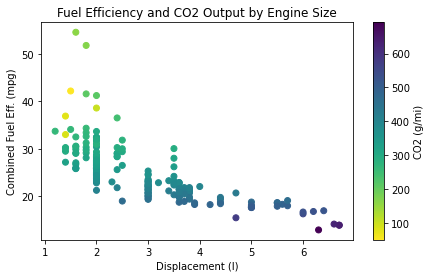

In [2]:
# loading in the data, sampling to reduce points plotted
fuel_econ = pd.read_csv('fuel-econ.csv')

np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

# plotting the data
plt.figure(figsize=[7,4])
plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c='co2',
            cmap='viridis_r')
plt.title('Fuel Efficiency and CO2 Output by Engine Size')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');

Here is another example for explanatory visulizations.

In [7]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [8]:
# data processing: isolate only fairy and dragon type Pokemon
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

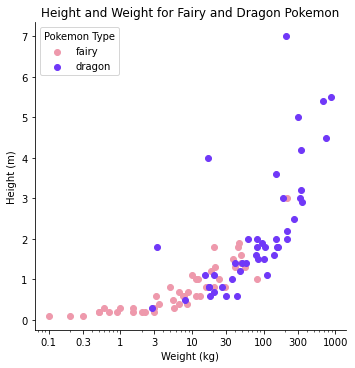

In [13]:
# MODIFY THIS CODE
# set mapping colors
type_colors = {'fairy': '#ee99ac', 'dragon': '#7038f8'}

g = sb.FacetGrid(data=pokemon_sub, hue='type', height=5, 
                 palette=type_colors)
g.map(plt.scatter, 'weight','height')

# transform x-axis to log scale
g.set(xscale='log');
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]

# use this to set tick locations and labels
# g.set(xticks=x_ticks, xticklabels=x_ticks)
# or use this
plt.xticks(ticks=x_ticks, labels=x_ticks)

g.set_xlabels('Weight (kg)')
g.set_ylabels('Height (m)')
g.set(title='Height and Weight for Fairy and Dragon Pokemon')

# add legend with a title
# g.add_legend(title='Pokemon Type');
plt.legend(loc=2, title='Pokemon Type');